# Data Project Using Yelp API
I started off this project as a practice for learning how to retrieve data using APIs. I expanded on this using the Yelp API data to predict the ratings based on the reviews. After gathering the data, I did some basic visualization of the distributions and created a word cloud for the reviews. For the sentiment analysis, I used NLTK to clean and tokenized the reviews. I built and tested the model using Native Bayes.

In [1]:
import requests
import pandas as pd
import time
import seaborn as sns
import creds

In [5]:
store_url = 'https://api.yelp.com/v3/businesses/search'
headers = {'Authorization': 'bearer %s' % creds.api_key}
params = {'location': 'NYC',
          'term': 'bubble tea',
          #'pricing_filter': '1, 2',
          #'attributes': 'hot_and_new'
         }

store_resp = requests.get(url=store_url, params=params, headers=headers).json()

In [8]:
store_resp

{'businesses': [{'id': 'bVJQEeRNi34-3XN_F1AZEg',
   'alias': 'xing-fu-tang-new-york',
   'name': 'Xing Fu Tang',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/vRLClNBs5NT0aQRYyLzYGg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/xing-fu-tang-new-york?adjust_creative=U3LEAeelRDkwcg95qVfPWw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=U3LEAeelRDkwcg95qVfPWw',
   'review_count': 187,
   'categories': [{'alias': 'bubbletea', 'title': 'Bubble Tea'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.7288, 'longitude': -73.98775},
   'transactions': ['pickup', 'delivery'],
   'location': {'address1': '133 2nd Ave',
    'address2': '',
    'address3': None,
    'city': 'New York',
    'zip_code': '10003',
    'country': 'US',
    'state': 'NY',
    'display_address': ['133 2nd Ave', 'New York, NY 10003']},
   'phone': '',
   'display_phone': '',
   'distance': 2656.4504266463246},
  {'id': 'y_eaORktt45Mn_e4ZkBBcA',
   'alias': 'i-milky

In [9]:
store_resp['businesses'][0]['location']['city']

'New York'

In [10]:
# first search result
store_resp['businesses'][0]

{'id': 'bVJQEeRNi34-3XN_F1AZEg',
 'alias': 'xing-fu-tang-new-york',
 'name': 'Xing Fu Tang',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/vRLClNBs5NT0aQRYyLzYGg/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/xing-fu-tang-new-york?adjust_creative=U3LEAeelRDkwcg95qVfPWw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=U3LEAeelRDkwcg95qVfPWw',
 'review_count': 187,
 'categories': [{'alias': 'bubbletea', 'title': 'Bubble Tea'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7288, 'longitude': -73.98775},
 'transactions': ['pickup', 'delivery'],
 'location': {'address1': '133 2nd Ave',
  'address2': '',
  'address3': None,
  'city': 'New York',
  'zip_code': '10003',
  'country': 'US',
  'state': 'NY',
  'display_address': ['133 2nd Ave', 'New York, NY 10003']},
 'phone': '',
 'display_phone': '',
 'distance': 2656.4504266463246}

In [11]:
store_id = store_resp['businesses'][0]['id']
store_id

'bVJQEeRNi34-3XN_F1AZEg'

In [12]:
store_name = store_resp['businesses'][0]['alias']
store_name

'xing-fu-tang-new-york'

In [13]:
for store in store_resp['businesses']:
  print(store['alias'])

xing-fu-tang-new-york
i-milky-williamsburg-brooklyn-2
trutea-new-york
alimama-new-york-3
miss-du-s-tea-shop-new-york
ojbk-tea-shop-brooklyn-2
wanpo-tea-shop-brooklyn
wanpo-tea-shop-new-york-3
i-milky-沐白-midtown-new-york-3
truedan-new-york-3
fiftylan-union-square-new-york-3
möge-tee-brooklyn-8
xing-fu-tang-flushing
moge-tee-brooklyn-6
debutea-brooklyn-brooklyn-2
mi-tea-new-york-4
debutea-new-york
taiyaki-nyc-williamsburg-brooklyn-7
moomoochaa-new-york-3
fuel-fever-brooklyn-2


In [14]:
# API call to get the business reviews
def get_reviews(store_id, store_alias):
  reviews_url = 'https://api.yelp.com/v3/businesses/{id}/reviews'.format(id=store_id)
  headers = {'Authorization': 'bearer %s' % API_KEY}

  resp = requests.get(url=reviews_url, headers=headers).json()
  time.sleep(1) # need to add this to allow each call to properly get all reviews
  details_df = pd.DataFrame()
  
  for store in resp['reviews']:
    review = store['text']
    rating = store['rating']
    date = store['time_created'].split(' ')[0]

    details_df = details_df.append({"id":store_id,
                                    "alias":store_alias,
                                    "date": date, 
                                    "rating":rating, 
                                    "review":review}, ignore_index=True)

  return details_df
    

The code above returns only 20 stores that appear in the search term 'boba' in nyc and 120 reviews total. I thought I was doing something wrong programmatically however, it turns out the maximum stores you can see is 50 and only 3 reviews per store.


In [15]:
# function to gather all data
def get_data():
  store_url = 'https://api.yelp.com/v3/businesses/search?limit=50' #without the limit, it will default to return only 20 stores
  headers = {'Authorization': 'bearer %s' % API_KEY}
  params = {'location': 'NYC',
            'categories': 'bubbletea'
            #'term': 'bubble tea',
            #'pricing_filter': '1, 2',
            #'attributes': 'hot_and_new'
          }
  #expected df to return
  df = pd.DataFrame(columns=["id","alias","date","rating","review"])

  store_resp = requests.get(url=store_url, params=params, headers=headers).json()
  time.sleep(1)

  for store in store_resp['businesses']:
    id = store['id']
    alias = store['alias']
    #print(store_id, store_name)

    details_df = get_reviews(id, alias)
    df = df.append(details_df, ignore_index=True)

  return df
  #return details_df

In [16]:
data = get_data()

In [17]:
data

,id,alias,date,rating,review
0,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-08-22,5.0,"Unique boba shop, only one group was allowed i..."
1,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-09-24,4.0,Super cool boba experience! Ultra customized b...
2,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-09-04,4.0,Teado lets you taste the drink to make any add...
3,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,2022-06-18,5.0,So in addition to my typical order of tea I de...
4,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,2022-06-10,5.0,My wife and I have gone to Tea and Milk countl...
...,...,...,...,...,...
145,OfrEANElOBKw3qhS00-dFQ,pig-pig-cafe-brooklyn-2,2022-03-16,5.0,This cafe is sooo cute. The name Pig Pig Cafe ...
146,OfrEANElOBKw3qhS00-dFQ,pig-pig-cafe-brooklyn-2,2022-10-13,5.0,Cute place with a variety of drinks that actua...
147,zyiauY6dhZa8WVmLQ83M2A,miss-du-s-tea-shop-new-york,2022-10-04,5.0,"If you are a fan of fruity teas/boba/drinks, M..."
148,zyiauY6dhZa8WVmLQ83M2A,miss-du-s-tea-shop-new-york,2022-09-09,3.0,Came here with my family after a dim sum lunch...


In [18]:
data.describe()

,rating
count,150.000000
mean,4.213333
std,1.161962
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
data['rating'].value_counts()

5.0    87
4.0    32
3.0    16
1.0     9
2.0     6
Name: rating, dtype: int64

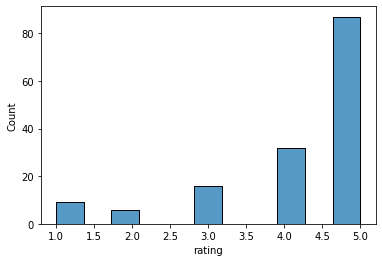

In [20]:
sns.histplot(data, x='rating')

The Yelp API for the businesses search only returns a maximum of 50 stores, of which we can only retrieve 3 reviews from each store. The next step would be to create multiple API calls such as boba spots from different cities by changing the url and parameters and then combining the dataframes together to create a larger dataset. 

In [21]:
data['alias'].nunique()

50

## Creating Dataset for Basic Sentiment Analysis
dataframe 1: Store 
store_id, store_name, alias, address1, city, state, zip, longitude, latitude, overall rating

dataframe 2: reviews
store_id, alias, date, rating, review

merge df1 and df2 on store_id and alias columns


In [22]:
# can change the location list for more stores in diff cities
def get_datasets():
  store_url = 'https://api.yelp.com/v3/businesses/search?limit=50' #without the limit, it will default to return only 20 stores
  headers = {'Authorization': 'bearer %s' % API_KEY}
  # loc_list = ['nyc', 'sf', 'san jose', 'los angeles', 'houston']
  loc_list = ['nyc']
  store_df = pd.DataFrame(columns=["id", "alias", "name", "avg_rating", "url", "review_count", "address", "city", "state", "zip_code", "latitude", "longitude"])
  review_df = pd.DataFrame(columns=["id", "alias", "date", "rating", "review"])

  for loc in loc_list:
    store_resp = requests.get(url=store_url, 
                              params={'location': '{x}'.format(x=loc),
                                      'categories': 'bubbletea'}, 
                              headers=headers).json()
    time.sleep(10) # need to add this to allow each call to properly get all reviews
    for store in store_resp['businesses']:
      id = store['id']
      alias = store['alias']
      name = store['name']
      avg_rating = store['rating']
      url = store['url']
      review_count = store['review_count']
      address = store['location']['address1']
      city = store['location']['city']
      state = store['location']['state']
      zip = store['location']['zip_code']
      latitude = store['coordinates']['latitude']
      longitude = store['coordinates']['longitude']
  
      #print(store_id, store_name)

      store_df = store_df.append({"id":id,
                            "alias":alias,
                            "name": name,
                            "avg_rating":avg_rating, 
                            "url": url,
                            "review_count":review_count, 
                            "address":address,
                            "city":city,
                            "state":state,
                            "zip_code":zip,
                            "latitude": latitude,
                            "longitude": longitude}, 
                           ignore_index=True)
      #print(id, alias)
      details_df = get_reviews(id, alias)
      #df = df.append(details_df, ignore_index=True)
      review_df = review_df.append(details_df, ignore_index=True)

  return store_df, review_df

In [23]:
store_df, review_df = get_datasets()

API URL: https://www.yelp.com/biz/hancos-brooklyn-2?adjust_creative=U3LEAeelRDkwcg95qVfPWw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=U3LEAeelRDkwcg95qVfPWw

URL for next review: https://www.yelp.com/biz/hancos-brooklyn-2?adjust_creative=U3LEAeelRDkwcg95qVfPWw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=U3LEAeelRDkwcg95qVfPWw&start=10

In [27]:
review_df.head()

,id,alias,date,rating,review
0,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-08-22,5.0,"Unique boba shop, only one group was allowed i..."
1,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-09-24,4.0,Super cool boba experience! Ultra customized b...
2,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,2022-09-04,4.0,Teado lets you taste the drink to make any add...
3,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,2022-06-18,5.0,So in addition to my typical order of tea I de...
4,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,2022-06-10,5.0,My wife and I have gone to Tea and Milk countl...


In [28]:
store_df.head()

,id,alias,name,avg_rating,url,review_count,address,city,state,zip_code,latitude,longitude
0,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,Teado Tea Shop,4.5,https://www.yelp.com/biz/teado-tea-shop-new-yo...,459,145D Hester St,New York,NY,10002,40.717214,-73.994962
1,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,Tea and Milk,4.5,https://www.yelp.com/biz/tea-and-milk-astoria?...,481,32-02 34th Ave,Astoria,NY,11106,40.759040,-73.926310
2,fUcjBGgmTlvxXn2azvAijw,yumpling-long-island-city,Yumpling,4.5,https://www.yelp.com/biz/yumpling-long-island-...,333,49-11 Vernon Blvd,Long Island City,NY,11101,40.745700,-73.954520
3,ytYVlCkrzcAxxUcbT4NTgA,juice-vitality-new-york,Juice Vitality,5.0,https://www.yelp.com/biz/juice-vitality-new-yo...,222,192 1st Ave,New York,NY,10009,40.729660,-73.983400
4,DbhBca8LzskjS0B-L4QfZg,tiger-sugar-new-york-9,Tiger Sugar,4.0,https://www.yelp.com/biz/tiger-sugar-new-york-...,527,197 Canal St,New York,NY,10013,40.717891,-73.999780


In [29]:
result = pd.merge(store_df, review_df, on=["id", "alias"])
result.head()

,id,alias,name,avg_rating,url,review_count,address,city,state,zip_code,latitude,longitude,date,rating,review
0,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,Teado Tea Shop,4.5,https://www.yelp.com/biz/teado-tea-shop-new-yo...,459,145D Hester St,New York,NY,10002,40.717214,-73.994962,2022-08-22,5.0,"Unique boba shop, only one group was allowed i..."
1,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,Teado Tea Shop,4.5,https://www.yelp.com/biz/teado-tea-shop-new-yo...,459,145D Hester St,New York,NY,10002,40.717214,-73.994962,2022-09-24,4.0,Super cool boba experience! Ultra customized b...
2,AYjVpQ5jYz5gJJqXh_B_CA,teado-tea-shop-new-york-6,Teado Tea Shop,4.5,https://www.yelp.com/biz/teado-tea-shop-new-yo...,459,145D Hester St,New York,NY,10002,40.717214,-73.994962,2022-09-04,4.0,Teado lets you taste the drink to make any add...
3,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,Tea and Milk,4.5,https://www.yelp.com/biz/tea-and-milk-astoria?...,481,32-02 34th Ave,Astoria,NY,11106,40.759040,-73.926310,2022-06-18,5.0,So in addition to my typical order of tea I de...
4,bvuPipiMPe5FURKZh06Zxg,tea-and-milk-astoria,Tea and Milk,4.5,https://www.yelp.com/biz/tea-and-milk-astoria?...,481,32-02 34th Ave,Astoria,NY,11106,40.759040,-73.926310,2022-06-10,5.0,My wife and I have gone to Tea and Milk countl...


In [30]:
store_df['avg_rating'].value_counts()

4.5    27
4.0    18
5.0     4
3.5     1
Name: avg_rating, dtype: int64

In [31]:
result['state'].value_counts()

NY    150
Name: state, dtype: int64

In [32]:
result['city'].value_counts()

New York            93
Brooklyn            42
Astoria              9
Long Island City     6
Name: city, dtype: int64

In [33]:
result['rating'].value_counts()

5.0    87
4.0    32
3.0    16
1.0     9
2.0     6
Name: rating, dtype: int64

##Write to CSV

In [ ]:
#review_df.to_csv('nyc_boba_reviews.csv', index=False)
store_df.to_csv('nyc_boba_store50.csv', index=False)
result.to_csv('nyc_merge_result.csv', index=False)

In [ ]:
store_df['url'].tolist()

## Get list of url to scrap all reviews for analysis
This list of urls consists of 250 different stores across 5 cities ('nyc', 'sf', 'san jose', 'los angeles', 'houston'). Yelp API only returns a maximum of 50 store results in a single call and only 3 reviews from each store. Additionally, the reviews do not show the full text. In a separate notebook, I used this list of urls to scrap Yelp using Beautiful Soup to gather all the reviews from each of the 250 stores.

In [ ]:
url_list = [i for i in result['url']]
url_list = list(set(url_list))
url_list

In [36]:
len(url_list)

50

## Word Cloud Visualization

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [38]:
text = " ".join(review for review in result.review)
print(len(text))

22939


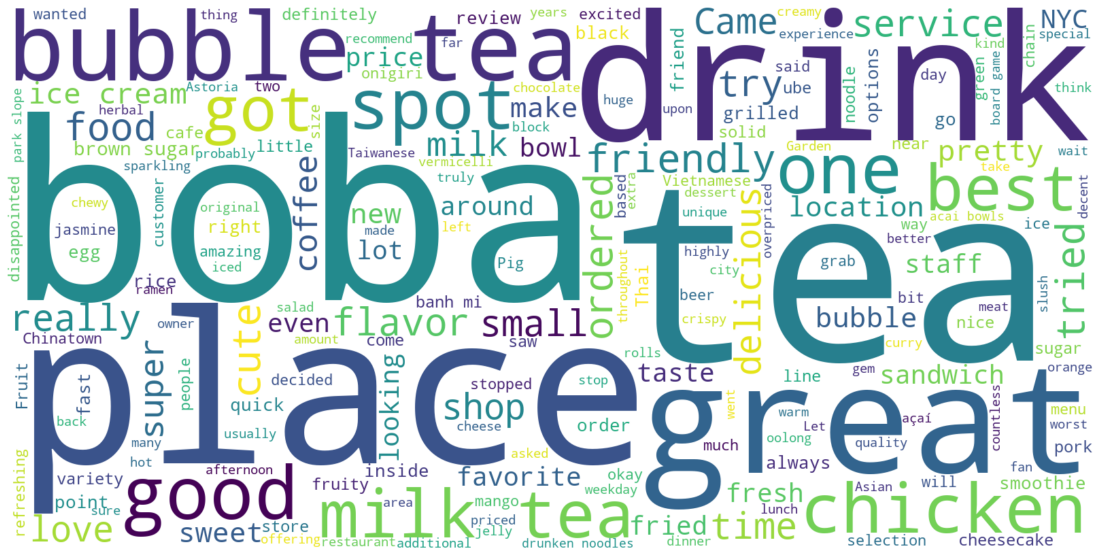

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

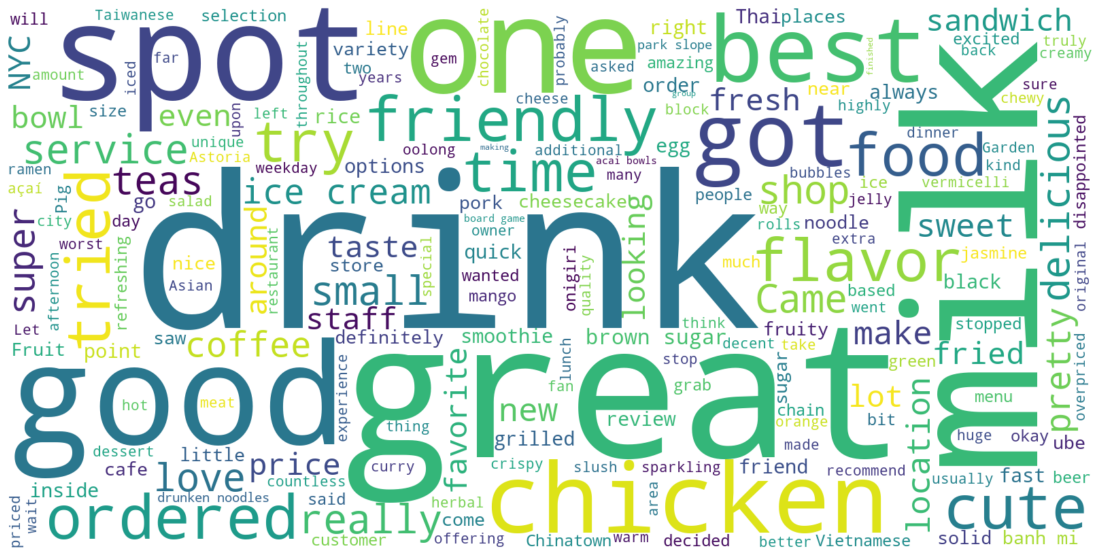

In [42]:
stopwords = set(STOPWORDS)
stopwords.update(["boba", "bubble", "place", "tea"])

wordcloud = WordCloud(background_color='white', stopwords=stopwords, width=1600, height=800).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Using NLP to Analyze Reviews
pos_tag = the word/token part of speech 

In [43]:
import nltk
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import classify
from nltk import NaiveBayesClassifier

from nltk.tokenize import TweetTokenizer


import re, string
import random

In [44]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [45]:
#add all the reviews into a list
review_list = []
for review in result['review']:
  review_list.append(review)

In [46]:
review_list[0]

"Unique boba shop, only one group was allowed in at a time making it a much more intimate experience. The owner has you test your drink before it's finished,..."

In [47]:
review_list[0][-10:]

'nished,...'

In [48]:
tokenized_review = []
for review in review_list:
  #tokenized_words = word_tokenize(review)
  tknzr = TweetTokenizer()
  tokenized_words = tknzr.tokenize(review)
  tokenized_review.append(tokenized_words)

In [49]:
tokenized_review[0]

['Unique',
 'boba',
 'shop',
 ',',
 'only',
 'one',
 'group',
 'was',
 'allowed',
 'in',
 'at',
 'a',
 'time',
 'making',
 'it',
 'a',
 'much',
 'more',
 'intimate',
 'experience',
 '.',
 'The',
 'owner',
 'has',
 'you',
 'test',
 'your',
 'drink',
 'before',
 "it's",
 'finished',
 ',',
 '...']

In [50]:
print(pos_tag(tokenized_review[0]))

[('Unique', 'NNP'), ('boba', 'NN'), ('shop', 'NN'), (',', ','), ('only', 'RB'), ('one', 'CD'), ('group', 'NN'), ('was', 'VBD'), ('allowed', 'VBN'), ('in', 'IN'), ('at', 'IN'), ('a', 'DT'), ('time', 'NN'), ('making', 'VBG'), ('it', 'PRP'), ('a', 'DT'), ('much', 'RB'), ('more', 'RBR'), ('intimate', 'JJ'), ('experience', 'NN'), ('.', '.'), ('The', 'DT'), ('owner', 'NN'), ('has', 'VBZ'), ('you', 'PRP'), ('test', 'VB'), ('your', 'PRP$'), ('drink', 'NN'), ('before', 'IN'), ("it's", 'NN'), ('finished', 'VBN'), (',', ','), ('...', ':')]


In [51]:
#normalize the words which did not make much difference
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens): # get tag for each token/word
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tokenized_review[0]))

['Unique', 'boba', 'shop', ',', 'only', 'one', 'group', 'be', 'allow', 'in', 'at', 'a', 'time', 'make', 'it', 'a', 'much', 'more', 'intimate', 'experience', '.', 'The', 'owner', 'have', 'you', 'test', 'your', 'drink', 'before', "it's", 'finish', ',', '...']


In [52]:
#removing noise or irrevelant words
def remove_noise(tweet_tokens, stop_words = ()):
  """
  This function removes noise such as hyperlinks, special symbols, and punctuation.
  It also applies lemmatization given the tag of each token.
  
  """
  cleaned_tokens = []

  for token, tag in pos_tag(tweet_tokens):
      token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                      '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
      token = re.sub("(@[A-Za-z0-9_]+)","", token)
      if tag.startswith("NN"):
          pos = 'n'
      elif tag.startswith('VB'):
          pos = 'v'
      else:
          pos = 'a'

      lemmatizer = WordNetLemmatizer()
      token = lemmatizer.lemmatize(token, pos)

      if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
          cleaned_tokens.append(token.lower())
  return cleaned_tokens

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
stop_words = stopwords.words('english')
stop_words.extend(["drink", "boba", "bubble", "tea", "place", "..."])

In [55]:
print(stop_words[-10:])

['won', "won't", 'wouldn', "wouldn't", 'drink', 'boba', 'bubble', 'tea', 'place', '...']


In [56]:
print(remove_noise(tokenized_review[0], stop_words))

['unique', 'shop', 'one', 'group', 'allow', 'time', 'make', 'much', 'intimate', 'experience', 'owner', 'test', 'finish']


In [57]:
five_star_tokens_list = []
four_star_tokens_list = []
three_star_tokens_list = []
two_star_tokens_list = []
one_star_tokens_list = []

five_star_tokens_cleaned_list = []
four_star_tokens_cleaned_list = []
three_star_tokens_cleaned_list = []
two_star_tokens_cleaned_list = []
one_star_tokens_cleaned_list = []

five_star_reviews = result.loc[result['rating'] == 5, 'review']
four_star_reviews = result.loc[result['rating'] == 4, 'review']
three_star_reviews = result.loc[result['rating'] == 3, 'review']
two_star_reviews = result.loc[result['rating'] == 2, 'review']
one_star_reviews = result.loc[result['rating'] == 1, 'review']

In [58]:
star_list = [five_star_reviews, four_star_reviews, three_star_reviews, two_star_reviews, one_star_reviews]
token_list = [five_star_tokens_list, four_star_tokens_list, three_star_tokens_list, two_star_tokens_list, one_star_tokens_list]
clean_token_list = [five_star_tokens_cleaned_list, four_star_tokens_cleaned_list, three_star_tokens_cleaned_list, two_star_tokens_cleaned_list, one_star_tokens_cleaned_list]
for i,star in enumerate(star_list):
  for review in star:
    tokenized_words = word_tokenize(review)
    token_list[i].append(tokenized_words)
    clean_token_list[i].append(remove_noise(tokenized_words, stop_words))

In [59]:
print(three_star_tokens_list[5])
print(three_star_tokens_cleaned_list[5])

['Friendly', 'and', 'quick', 'service', '.', 'Drinks', 'and', 'food', 'left', 'a', 'lot', 'to', 'be', 'desired', '.', 'Tried', 'the', 'fried', 'chicken', 'and', 'tuna', 'onigiri', ',', 'both', 'were', 'disappointing', '.', 'Fried', 'chicken', 'was', '...']
['friendly', 'quick', 'service', 'drinks', 'food', 'leave', 'lot', 'desire', 'tried', 'fry', 'chicken', 'tuna', 'onigiri', 'disappointing', 'fried', 'chicken']


In [60]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_five_star_words = get_all_words(five_star_tokens_cleaned_list)
all_four_star_words = get_all_words(four_star_tokens_cleaned_list)
all_three_star_words = get_all_words(three_star_tokens_cleaned_list)
all_two_star_words = get_all_words(two_star_tokens_cleaned_list)
all_one_star_words = get_all_words(one_star_tokens_cleaned_list)

In [61]:
all_words_list = [all_five_star_words, all_four_star_words, all_three_star_words, all_two_star_words, all_one_star_words]

In [62]:
freq_dist_five = FreqDist(all_five_star_words)
print(freq_dist_five.most_common(10))

freq_dist_four = FreqDist(all_four_star_words)
print(freq_dist_four.most_common(10))

freq_dist_three = FreqDist(all_three_star_words)
print(freq_dist_three.most_common(10))

freq_dist_two = FreqDist(all_two_star_words)
print(freq_dist_two.most_common(10))

freq_dist_one = FreqDist(all_one_star_words)
print(freq_dist_one.most_common(10))

[('great', 23), ('milk', 17), ('one', 16), ('get', 15), ("'ve", 13), ("'s", 12), ('best', 12), ('good', 12), ('make', 10), ('try', 10)]
[("'s", 12), ('spot', 8), ('milk', 7), ("n't", 7), ('get', 7), ('super', 6), ('good', 6), ('cute', 6), ('order', 5), ('time', 5)]
[("n't", 5), ('ice', 4), ('try', 4), ('stop', 3), ('review', 3), ('pretty', 3), ('good', 3), ("'s", 3), ('time', 2), ('flavor', 2)]
[('try', 3), ('away', 2), ('fruity', 2), ('taste', 2), ('like', 2), ('noodle', 2), ('special', 2), ('orange', 2), ('sparkle', 2), ("n't", 2)]
[('bad', 3), ('food', 2), ('chicken', 2), ('extra', 2), ('matcha', 2), ('sweet', 2), ('really', 2), ('good', 2), ('order', 2), ('say', 2)]


In [63]:
all_reviews_cleaned = []
max_len = len(tokenized_review)
for i in range(max_len):
  x = remove_noise(tokenized_review[i], stop_words)
  all_reviews_cleaned.append(x)

In [64]:
words = []
for reviews in all_reviews_cleaned:
  for word in reviews:
    words.append(word)

In [65]:
x = ' '.join(all_reviews_cleaned[1])
x

'super cool experience ultra customize individual preference walk saw line usually line mean good line'

In [66]:
cleaned_reviews_df = pd.DataFrame(columns=['reviews'])
for i in range(max_len):
  x = ' '.join(all_reviews_cleaned[i])
  a_series = pd.Series(x, index = cleaned_reviews_df.columns)
  cleaned_reviews_df = cleaned_reviews_df.append(a_series, ignore_index=True)
cleaned_reviews_df

,reviews
0,unique shop one group allow time make much int...
1,super cool experience ultra customize individu...
2,teado let taste make additional change great s...
3,addition typical order decide try one bahn mi ...
4,wife go milk countless time since 2015 truly t...
...,...
145,cafe sooo cute name pig pig cafe really love p...
146,cute variety actually taste good price reasona...
147,fan fruity miss du's extensive menu delicious ...
148,came family dim sum lunch they're pretty small...


In [67]:
words_freq_dist = FreqDist(words)
freq_dist_df = pd.DataFrame(words_freq_dist.most_common(20), columns=['Word', 'Count'])
freq_dist_df

,Word,Count
0,great,29
1,milk,27
2,get,26
3,good,24
4,try,22
5,one,19
6,i've,19
7,spot,19
8,order,18
9,chicken,17


In [68]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in words]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])
stemmed_dist

,Word,Frequency
0,great,29
1,milk,27
2,tri,26
3,get,26
4,good,24
5,order,22
6,one,19
7,i'v,19
8,spot,19
9,chicken,17


In [70]:
result[['review']].head()

,review
0,"Unique boba shop, only one group was allowed i..."
1,Super cool boba experience! Ultra customized b...
2,Teado lets you taste the drink to make any add...
3,So in addition to my typical order of tea I de...
4,My wife and I have gone to Tea and Milk countl...


In [71]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(cleaned_reviews_df['reviews'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
bigram_frequency

,bigram,frequency
773,ice cream,9
185,brown sugar,7
106,banh mi,5
1461,spot grab,3
1064,one best,3
429,drunken noodle,3
1584,thai milk,3
297,come back,3
509,fast service,3
1358,service great,3


## Data for Modeling

In [74]:
#creates a dict with the token as a key and True as the value
def get_reviews_for_model(cleaned_tokens_list):
  for tokenized_review in cleaned_tokens_list:
    yield dict([token, True] for token in tokenized_review)

five_star_tokens_for_model = get_reviews_for_model(five_star_tokens_cleaned_list)
four_star_tokens_for_model = get_reviews_for_model(four_star_tokens_cleaned_list)
three_star_tokens_for_model = get_reviews_for_model(three_star_tokens_cleaned_list)
two_star_tokens_for_model = get_reviews_for_model(two_star_tokens_cleaned_list)
one_star_tokens_for_model = get_reviews_for_model(one_star_tokens_cleaned_list)


In [75]:
five_star_tokens_for_model

<generator object get_reviews_for_model at 0x7f5fda89a150>

In [76]:
#add labels for each review as a dict
five_star_dataset = [(review, "five")
                     for review in five_star_tokens_for_model]

four_star_dataset = [(review, "four")
                     for review in four_star_tokens_for_model]

three_star_dataset = [(review, "three")
                     for review in three_star_tokens_for_model]

two_star_dataset = [(review, "two")
                     for review in two_star_tokens_for_model]

one_star_dataset = [(review, "one")
                     for review in one_star_tokens_for_model]

dataset = five_star_dataset + four_star_dataset + three_star_dataset + two_star_dataset + one_star_dataset

In [78]:
five_star_dataset[0]

({'unique': True,
  'shop': True,
  'one': True,
  'group': True,
  'allow': True,
  'time': True,
  'make': True,
  'much': True,
  'intimate': True,
  'experience': True,
  'owner': True,
  'test': True,
  "'s": True,
  'finish': True},
 'five')

In [79]:
dataset[0]

({'unique': True,
  'shop': True,
  'one': True,
  'group': True,
  'allow': True,
  'time': True,
  'make': True,
  'much': True,
  'intimate': True,
  'experience': True,
  'owner': True,
  'test': True,
  "'s": True,
  'finish': True},
 'five')

In [80]:
#there's a total of 1351 reviews, this is about a 70/30 split for train/test
random.shuffle(dataset)
train_data = dataset[:950]
test_data = dataset[950:]

In [ ]:
dataset

## Building and Testing Model Using Native Bayes

In [82]:
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0
Most Informative Features
                      -- = True              two : five   =     12.6 : 1.0
                   block = True              two : five   =     12.6 : 1.0
                    came = True              two : five   =     12.6 : 1.0
                    earl = True              two : five   =     12.6 : 1.0
                  fruity = True              two : five   =     12.6 : 1.0
                    fung = True              two : five   =     12.6 : 1.0
                     got = True              two : five   =     12.6 : 1.0
                    high = True              two : five   =     12.6 : 1.0
                    huge = True              two : five   =     12.6 : 1.0
                   kirby = True              two : five   =     12.6 : 1.0
None


In [83]:
custom_review = "It was delicious but im not sure if i like it because it was sour and smelly. my dad did not like it at all. "

custom_tokens = remove_noise(word_tokenize(custom_review))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

two


## Constraints:
The Yelp API does not return full review text. Three review excerpts of 160 characters are provided by default.  
There were two main constraints with getting data using the Yelp API. The first is the API can only return 3 reviews for each business and you can search for 50 businesses max. That totals to only 150 reviews per API call. I simply looped through 10 different cities to get more data on the reviews. The second limitation is that the API only provides review excerpts of 160 characters. If we could get more data with the full text of the review, it could have provided better results.

## References: 
https://towardsdatascience.com/text-mining-and-sentiment-analysis-for-yelp-reviews-of-a-burger-chain-6d3bcfcab17b